# Práctica 1. Introducción a Python

Autor: Tania Ivonne Rueda Fujiwara Desarrollar las funciones crea_un_grafo_completo, calcula_grados_de_entrada, dist_grados_de_entrada, dist_normalizada, grafica_distr y grafica_distr_norm, las cuales permitirán graficar la distribución de grados de una gráfica

In [203]:
#Defina a n, siendo este un número entero 
num_entero_para_Kn = 6

#Se definen los diccionarios de las gráficas dirigidas:
#Los ejemplos:
red_ejemplo_Uno = {0: {}, 1: {0}, 2: {0}, 3: {0}, 4: {0}}
red_ejemplo_Dos = {0: {1,2,3,4}, 1: {0,2,3,4}, 2: {0 ,1,3,4}, 3: {0,1,2,4}, 4: {0,1,2,3}}

#Gráfica dirigida de la práctica
grafica = {0: {3,5}, 1: {0,2,4}, 2: {3}, 3: {1,4}, 4: {3}, 5: {4}}

In [204]:
#Definiendo la función crea_un_grafo_completo, recibe un número entero n y regresa un diccionario 
#que representa una gráfica completa Kn 
def crea_un_grafo_completo(n):
    Kn = n
    grafica_completa = dict()
    
#A través del ciclo while generamos todos los nodos (keys) de la n recibida    
    llaves = list()
    x = 0
    while x < Kn:
        llaves.append(x)
        x += 1
        
#A través del doble ciclo for se genera el diccionario grafica_completa, que contiene a la grafica Kn
    todos_valores = list()
    valor = set()
    for i in llaves:
        for j in llaves:
            if i != j:
                todos_valores.append(j)
                j += 1
        valor = set(todos_valores)
        grafica_completa.update({llaves[i]: valor})
        todos_valores.clear()
    return(grafica_completa)
pass

## Se muestra el diccionario contenedor de la grafica Kn, apartir de la n dedinida.

In [206]:
crea_un_grafo_completo(num_entero_para_Kn)

{0: {1, 2, 3, 4, 5},
 1: {0, 2, 3, 4, 5},
 2: {0, 1, 3, 4, 5},
 3: {0, 1, 2, 4, 5},
 4: {0, 1, 2, 3, 5},
 5: {0, 1, 2, 3, 4}}

In [207]:
#Definiendo la función calcula_grados_de_entrada, recibe un diccionario (d_grafica) que representa una gráfica dirigida y 
#devuelve un diccionario en donde las llaves representan los nodos de la gráfica dirigida y los valores son el grado de
#entrada de cada nodo
def calcula_grados_de_entrada(d_grafica):
    grafica_dirigida = d_grafica
    grados_entrada = dict()
    lista_grados = list()

#En lista_nodos se almacenan todos los nodos (keys) de la red recibida 
#En nodos_adyacentes se almacenan todos los valores (values) de cada nodos de la red recibida    
    lista_nodos = list(grafica_dirigida)
    nodos_adyacentes = grafica_dirigida.values()
    
#A través de este for se calcula el grado de de entrada de cada nodo y se guarda en la lista lista_grados  
    elem_conjunto = -1
    for w in nodos_adyacentes:
        elem_conjunto = len(w)
        lista_grados.append(elem_conjunto)      
    
#A través de este while se crea grados, este es el directorio que contiene el grado de entrada de cada nodo    
    indice = 0
    while indice < len(lista_nodos):
        grados_entrada.update({lista_nodos[indice]: lista_grados[indice]})
        indice += 1
    return(grados_entrada)
pass


## Se muestra el diccionario contenedor de los grados de entrada de un diccionario 

In [208]:
calcula_grados_de_entrada(crea_un_grafo_completo(num_entero_para_Kn))

{0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5}

In [209]:
#Definiendo la función dist_grados_de_entrada, recibe un diccionario (d_grafica) que representa una gráfica dirigida 
#y devolverá un diccionario (distr) en donde las llaves representan los diferentes grados de entrada, y los valores 
#representan el número de nodos con dicho grado. Esta función debe utilizar la función calcula_grados_de_entrada. 
def dist_grados_de_entrada(d_grafica):
    grafica = d_grafica
    grados_entrada = calcula_grados_de_entrada(grafica)
    distr = dict()

#En lista_grados_repetidos se almacenan todos los valores (values) de la red recibida      
    lista_grados_repetidos = list(grados_entrada.values())
    
#En conjunto_grados_unicos se almacenan los valores (values) de la red recibida excluyendo a los que se repitan
    conjunto_grados_unicos = set(grados_entrada.values())

#A través de este for se genera en un diccionario (distr) en donde las llaves representan los diferentes grados de entrada, 
#y los valores representan el número de nodos con dicho grado
    for valor in conjunto_grados_unicos:
        distr[valor] = lista_grados_repetidos.count(valor)
    return distr
pass

## Se muestra la distribución de los grados de entrada de un diccionario

In [210]:
dist_grados_de_entrada(crea_un_grafo_completo(num_entero_para_Kn))

{5: 6}

In [211]:
#Definiendo la función dist_normalizada, recibe un diccionario (d_grafica) que representa una gráfica dirigida
#y devolverá un diccionario (distr_norm) en donde las llaves representan los diferentes grados de salida, y los 
#valores representan el número de nodos con dicho grado. Esta función debe llamar a la función dist_grados_de_entrada.
def dist_normalizada(d_grafica):
    grafica = d_grafica
    distr_grados = dist_grados_de_entrada(grafica)
    distr_norm = dict()
    
#A través de este for se genera el diccionario distr_norm que contiene la distribición de grados de entrada normalizada 
    for grado, cant_nodos in distr_grados.items():
        distr_norm[grado] = cant_nodos/len(grafica.keys())
    
    return(distr_norm)
pass

## Se muestra la distribución de los grados de entrada normalizada de un diccionario

In [212]:
dist_normalizada(crea_un_grafo_completo(num_entero_para_Kn))

{5: 1.0}

In [213]:
# Importa la funcion pyplot del modulo matplotlib. La funcion sera llamada con el alias plt
import matplotlib.pyplot as plt

In [214]:
#Definiendo la función grafica_distr, recibe un diccionario (distr) que representa la distribución de grados 
#de una gráfica, y grafica dicha distribución usando la librería matplotlib. El eje x debe estar etiquetado como 
#‘grado nodal’, el eje y como ‘número de nodos’, el título debe ser ‘Distribución de Grados de Entrada’. 
def grafica_distr(distr):
    distribucion = distr
    
#El eje x esta dado por una lista que contiene los grados (keys) del diccionario recibido
    eje_x = list(distribucion.keys())
    
# El eje_y esta dado por una lista que contiene el número de nodos(values) del diccionario recibido
    eje_y = list(distribucion.values())
    
    plt.plot(eje_x, eje_y, color='blue', marker='o', linestyle='solid')
    plt.title("Distribución de Grados de Entrada")
    plt.xlabel("Grado nodal")
    plt.ylabel("Número de nodos")
    plt.show()
    
pass

## Se muestra la gráfica de la distribución de los grados de entrada

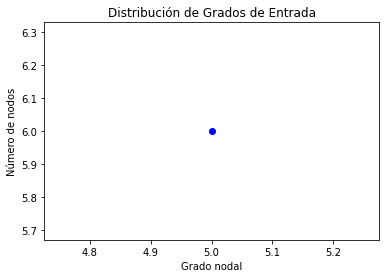

In [215]:
grafica_distr(dist_grados_de_entrada(crea_un_grafo_completo(num_entero_para_Kn)))    


In [216]:
#Definiendo la función grafica_distr_norm, está recibe un diccionario (distr_norm) que representa la 
#distribución normalizada de grados de una gráfica, y grafica dicha distribución usando la librería matplotlib. 
#El eje x debe estar etiquetado como ‘grado nodal’, el eje y como ‘proporción de nodos’, el título debe ser
#‘Distribución Normalizada de Grados de Entrada’.
def grafica_distr_norm(distr_norm):
    distribucion = distr_norm
    
#El eje x esta dado por una lista que contiene los grados (keys) del diccionario recibido
    eje_x = list(distribucion.keys())
    
# El eje_y esta dado por una lista que contiene la proporción de nodos (values) del diccionario recibido
    eje_y = list(distribucion.values())
    
    plt.plot(eje_x, eje_y, color='blue', marker='o', linestyle='solid')
    plt.title("Distribución Normalizada de Grados de Entrada")
    plt.xlabel("Grado nodal")
    plt.ylabel("Proporción de nodos")
    plt.show()
pass

## Se muestra la gráfica de la distribución de los grados de entrada normalizada

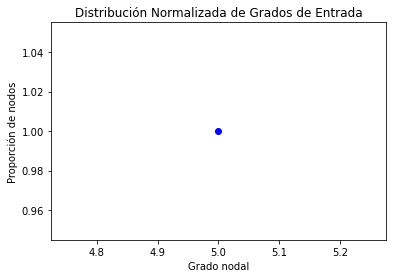

In [217]:
grafica_distr_norm(dist_normalizada(crea_un_grafo_completo(num_entero_para_Kn)))  